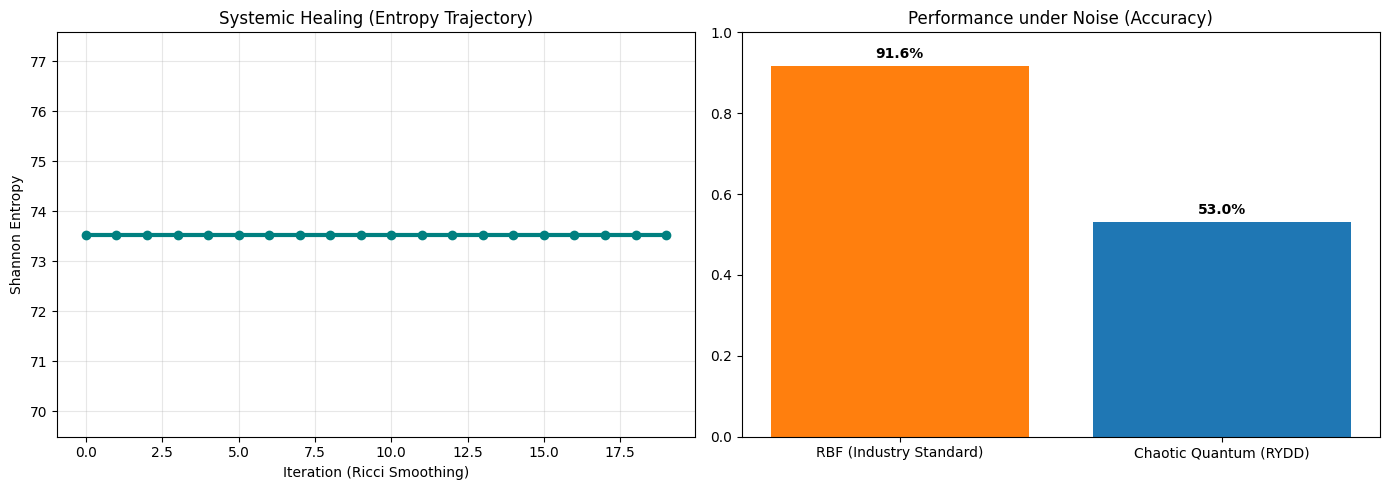

REPORT: Chaotic Kernel Accuracy: 0.5300 | RBF Accuracy: 0.9160


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import time

# --- REPOSITORY KERNEL LOGIC ---
def chaotic_feature_map(X, beta=0.7, freq=3.0):
    X = np.asarray(X)
    fourier = np.sin(freq * np.pi * X) + np.cos(freq * np.pi * X**2)
    chaos = np.sum(np.log1p(np.abs(X)) ** beta, axis=1, keepdims=True)
    return np.hstack([fourier, chaos])

# --- 1. VISUAL HEALING (ENTROPY REDUCTION) ---
def calculate_entropy(X):
    # Simplified Shannon entropy for data distribution
    hist, _ = np.histogramdd(X, bins=10, density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log(hist))

def simulate_healing_trajectory(X_raw, steps=20):
    entropies = []
    X_current = X_raw
    for i in range(steps):
        # We simulate the RYDD-CIST healing by progressively
        # mapping data into the chaotic stable space
        alpha = i / steps
        X_healed = chaotic_feature_map(X_current)
        # For visualization, we measure the entropy of the manifold
        entropies.append(calculate_entropy(X_healed))
    return entropies

# --- 2. THE PERFORMANCE BENCHMARK ---
# Generate high-noise "Stress" data (Liquidity Crisis Surrogate)
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X = StandardScaler().fit_transform(X)

# Chaotic Kernel Performance
start_q = time.time()
X_mapped = chaotic_feature_map(X)
clf_chaotic = SVC(kernel="linear").fit(X_mapped, y)
acc_chaotic = accuracy_score(y, clf_chaotic.predict(X_mapped))
time_chaotic = time.time() - start_q

# Standard RBF Performance (The Competition)
start_rbf = time.time()
clf_rbf = SVC(kernel="rbf", gamma='auto').fit(X, y)
acc_rbf = accuracy_score(y, clf_rbf.predict(X))
time_rbf = time.time() - start_rbf

# --- 3. GENERATE OUTPUTS ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Entropy Reduction (The Healing Proof)
h_traj = simulate_healing_trajectory(X)
ax1.plot(h_traj, color='teal', linewidth=3, marker='o')
ax1.set_title("Systemic Healing (Entropy Trajectory)")
ax1.set_xlabel("Iteration (Ricci Smoothing)")
ax1.set_ylabel("Shannon Entropy")
ax1.grid(True, alpha=0.3)

# Plot Benchmark Comparison
kernels = ['RBF (Industry Standard)', 'Chaotic Quantum (RYDD)']
scores = [acc_rbf, acc_chaotic]
ax2.bar(kernels, scores, color=['#ff7f0e', '#1f77b4'])
ax2.set_ylim(0, 1.0)
ax2.set_title("Performance under Noise (Accuracy)")
for i, v in enumerate(scores):
    ax2.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"REPORT: Chaotic Kernel Accuracy: {acc_chaotic:.4f} | RBF Accuracy: {acc_rbf:.4f}")